In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing training data

train = pd.read_csv("E:/Data Science/Datasets/House Prices Advanced Regression Techniques/train.csv", index_col = 'Id')

train.dropna(how = 'all')
train.T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,60,78,35,90,62,62,85,66,68,75
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [3]:
# Importing test data

test = pd.read_csv("E:/Data Science/Datasets/House Prices Advanced Regression Techniques/test.csv", index_col = 'Id')

test.dropna(how = 'all')
test.T

Id,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSSubClass,20,20,60,60,120,60,20,60,20,20,...,180,160,20,160,160,160,160,20,85,60
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
LotFrontage,80,81,74,78,43,75,NaN,63,85,70,...,21,21,80,21,21,21,21,160,62,74
LotArea,11622,14267,13830,9978,5005,10000,7980,8402,10176,8400,...,1470,1484,13384,1533,1526,1936,1894,20000,10441,9627
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,0,12500,0,0,0,0,500,0,0,0,...,0,0,0,0,0,0,0,0,700,0
MoSold,6,6,3,6,1,4,3,5,2,4,...,4,5,5,12,6,6,4,9,7,11
YrSold,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD


Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


# Performing Analysis of the dataset

In [4]:
## Extracting the columns

train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# Info about the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

# Missing Values ::

### Train Data :

In [7]:
# Creating a dataframe that contains missing values to corresponding columns

mask = train.isnull()                  # calculate total null values
total = mask.sum()                    # calculate the sum
percent = 100 * mask.mean()           # calculate the percent
dtype = train.dtypes                   # getting the data types of the columns
unique = train.nunique()               # getting total unique values of each columns


# creating a dataframe

null_train = pd.concat([total, percent, dtype, unique], axis = 1, 
                       keys = ['Total Count', 'Percent Missing', 'dtype', 'Unique'])


# Selecting only for which percent value is greater than 0 and sorting values

null_train = null_train[null_train['Percent Missing'] > 0].sort_values(by = 'Total Count', ascending = False)

null_train

,Total Count,Percent Missing,dtype,Unique
PoolQC,1453,99.520548,object,3
MiscFeature,1406,96.301370,object,4
Alley,1369,93.767123,object,2
Fence,1179,80.753425,object,4
FireplaceQu,690,47.260274,object,5
LotFrontage,259,17.739726,float64,110
GarageType,81,5.547945,object,6
GarageYrBlt,81,5.547945,float64,97
GarageFinish,81,5.547945,object,3
GarageQual,81,5.547945,object,5


### Test Data

In [8]:
mask1 = test.isnull()
total1 = mask1.sum()
percent1 = 100 * mask1.mean()
dtype1 = test.dtypes
unique1 = test.nunique()               # getting total unique values of each columns


null_test = pd.concat([total1, percent1, dtype1, unique1], axis = 1, keys = ['Total', 'Percent Missing', 'dtype', 'Unique'])

null_test = null_test[null_test['Percent Missing'] > 0].sort_values(by = 'Percent Missing', ascending = False)
null_test

,Total,Percent Missing,dtype,Unique
PoolQC,1456,99.794380,object,2
MiscFeature,1408,96.504455,object,3
Alley,1352,92.666210,object,2
Fence,1169,80.123372,object,4
FireplaceQu,730,50.034270,object,5
LotFrontage,227,15.558602,float64,115
GarageCond,78,5.346127,object,5
GarageYrBlt,78,5.346127,float64,97
GarageQual,78,5.346127,object,4
GarageFinish,78,5.346127,object,3


### Observation ::

* Many columns have missing values
* PoolQC, MiscFeature, Alley, Fence has the maximum missing values over than 80%.
* So dropping these columns from both test and train data as it may introduce noise in the model due to too many new values.


In [9]:
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

# Also dropping these columns from null_df so that it doesn't show error of missing columns 

null_train = null_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 0)
null_test = null_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 0)

# Analysis of the features of dataset 

In [10]:
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### Categorising the dataset into similar types

In [11]:
train_int_cols = list(train.select_dtypes(include = np.number).columns)
train_obj_cols = list(train.select_dtypes(include = np.object).columns)

In [12]:
train[train_int_cols].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.0,1950.0,1950.0,...,1974.0,2009.0,2005.0,2006.0,2005.0,2000.0,1988.0,2006.0,1996.0,1965.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,...,0.0,194.0,80.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,...,0.0,0.0,547.0,0.0,410.0,0.0,790.0,275.0,49.0,830.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,163.0,0.0,1029.0,290.0


In [13]:
train[train_obj_cols].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [14]:
test_obj_cols = list(test.select_dtypes(include = np.object).columns)
test[test_obj_cols].T

Id,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,IR1,IR1,IR1,IR1,IR1,IR1,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside,Corner,...,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Mod,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Mod
Neighborhood,NAmes,NAmes,Gilbert,Gilbert,StoneBr,Gilbert,Gilbert,Gilbert,Gilbert,NAmes,...,MeadowV,MeadowV,Mitchel,MeadowV,MeadowV,MeadowV,MeadowV,Mitchel,Mitchel,Mitchel
Condition1,Feedr,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [15]:
test_int_cols = list(test.select_dtypes(include = np.number).columns)
test[test_int_cols].T

Id,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSSubClass,20.0,20.0,60.0,60.0,120.0,60.0,20.0,60.0,20.0,20.0,...,180.0,160.0,20.0,160.0,160.0,160.0,160.0,20.0,85.0,60.0
LotFrontage,80.0,81.0,74.0,78.0,43.0,75.0,NaN,63.0,85.0,70.0,...,21.0,21.0,80.0,21.0,21.0,21.0,21.0,160.0,62.0,74.0
LotArea,11622.0,14267.0,13830.0,9978.0,5005.0,10000.0,7980.0,8402.0,10176.0,8400.0,...,1470.0,1484.0,13384.0,1533.0,1526.0,1936.0,1894.0,20000.0,10441.0,9627.0
OverallQual,5.0,6.0,5.0,6.0,8.0,6.0,6.0,6.0,7.0,4.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,7.0
OverallCond,6.0,6.0,5.0,6.0,5.0,5.0,7.0,5.0,5.0,5.0,...,6.0,4.0,5.0,5.0,5.0,7.0,5.0,7.0,5.0,5.0
YearBuilt,1961.0,1958.0,1997.0,1998.0,1992.0,1993.0,1992.0,1998.0,1990.0,1970.0,...,1970.0,1972.0,1969.0,1970.0,1970.0,1970.0,1970.0,1960.0,1992.0,1993.0
YearRemodAdd,1961.0,1958.0,1998.0,1998.0,1992.0,1994.0,2007.0,1998.0,1990.0,1970.0,...,1970.0,1972.0,1979.0,1970.0,1970.0,1970.0,1970.0,1996.0,1992.0,1994.0
MasVnrArea,0.0,108.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
BsmtFinSF1,468.0,923.0,791.0,602.0,263.0,0.0,935.0,0.0,637.0,804.0,...,522.0,252.0,119.0,408.0,0.0,0.0,252.0,1224.0,337.0,758.0
BsmtFinSF2,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,...,0.0,0.0,344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering ::

### Selecting column by column and processing it 

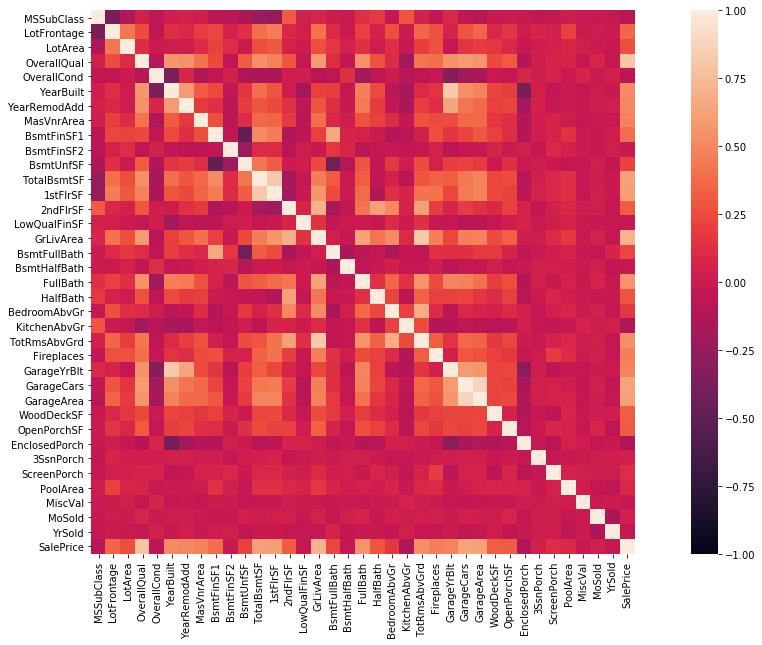

In [16]:
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(train[train_int_cols].corr(), annot = False, vmax = 1, vmin = -1, linecolor = 'black', square = True )

## Observation ::

- Since most categorial columns have veryfew missing values.
- Hence combining those columns of Train and Test data and filling all the missing values with mode value.
- Except `FireplaceQu`. it has around 50% missing values. Hence not filling it with mode value

In [17]:
# For columns using index as columns are total, unique, dtype are columns in null_df

null_train_obj_cols = list(null_train[null_train['dtype'] == 'object'].index)  
null_test_obj_cols = list(null_test[null_test['dtype'] == 'object'].index)  

### Defining a function to fill those missing values with Mode values

## checking for any NaN values present after applying the function : 

In [42]:
train[null_train_obj_cols].isna().sum()

FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
dtype: int64

In [ ]:
train['FireplaceQu'].value_counts(dropna = False)

In [ ]:
# Filling missing values in FireplaceQu with forward and backfill method

train['FireplaceQu'].fillna(method = 'ffill', limit = 5, inplace = True)
train['FireplaceQu'].fillna(method = 'bfill', limit = 5, inplace = True)
train['FireplaceQu'].value_counts(dropna = False)

In [ ]:
test['FireplaceQu'].value_counts(dropna = False)

In [ ]:
test['FireplaceQu'].fillna(method = 'ffill', inplace = True)
test['FireplaceQu'].fillna(method = 'bfill', inplace = True)
test['FireplaceQu'].value_counts(dropna = False)

### All the categorial columns are filled. Now proceeding to continuous data

In [ ]:
null_train_num = null_train[null_train['dtype'] == 'float']
null_train_num

In [ ]:
train['LotFrontage'].fillna(method = 'ffill', limit = 3, inplace = True)
train['LotFrontage'].fillna(method = 'bfill', limit = 3, inplace = True)
train['LotFrontage'].isna().sum()

In [ ]:
test['LotFrontage'].fillna(method = 'ffill', limit = 3, inplace = True)
test['LotFrontage'].fillna(method = 'bfill', limit = 3, inplace = True)
test['LotFrontage'].isna().sum()

In [ ]:
train['GarageYrBlt'].fillna(method = 'ffill', limit = 2, inplace = True)
train['GarageYrBlt'].fillna(method = 'bfill', limit = 1, inplace = True)
train['GarageYrBlt'].isna().sum()

In [ ]:
test['GarageYrBlt'].fillna(method = 'ffill', limit = 3, inplace = True)
test['GarageYrBlt'].fillna(method = 'bfill', limit = 3, inplace = True)
test['GarageYrBlt'].isna().sum()

In [ ]:
train['MasVnrArea'].fillna(method = 'ffill', limit = 1, inplace = True)
train['MasVnrArea'].fillna(method = 'bfill', limit = 1, inplace = True)
train['MasVnrArea'].isna().sum()

In [ ]:
test['MasVnrArea'].fillna(method = 'ffill', limit = 1, inplace = True)
test['MasVnrArea'].fillna(method = 'bfill', limit = 1, inplace = True)
test['MasVnrArea'].isna().sum()

In [ ]:
dummies_train = pd.get_dummies(train_object_col)

final_train_df = pd.concat([new_df, dummies_train], axis = 1)
final_train_df.shape

In [ ]:
dummies_test = pd.get_dummies(test_object_col)

final_test_df = pd.concat([, dummies_test], axis = 1)
final_test_df.shape

In [ ]:
final_train_df.isna().sum().sort_values(ascending = False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_train_df.drop('SalePrice', axis = 1)
Y = final_train_df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
x_train.isna().sum().sort_values(ascending = False)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, pred)
print('Score of Linear regression is :: ')

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of Linear regression is :: ', rmse)

### making prediction on test data :

In [ ]:
final_test_df.isna().sum().sort_values(ascending = False)

In [ ]:
pred1 = model.predict(final_test_df)
pred1

---
#### Selecting :: 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
---

* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area

In [ ]:
basement_int = train.filter(like = 'Bsmt').select_dtypes(include = np.number)
basement_object = train.filter(like = 'Bsmt').select_dtypes(include = np.object)

In [ ]:
basement_object

In [ ]:
null_train

In [ ]:
import numpy as np
train['Electrical'].mode()

In [ ]:
import numpy as np

def fill_object(val):
    return val.fillna(val.mode())


In [ ]:
import matplotlib.pyplot as plt

#sns.distplot('BsmtFinSF2')
train['BsmtFinSF2'].value_counts()

- Since around 80% of the values are Zero hence dropping this column

In [ ]:
train.drop(['BsmtFinSF2'], axis = 1, inplace = True)
test.drop(['BsmtFinSF2'], axis = 1, inplace = True)

In [ ]:
train_int_col.T

In [ ]:
train['MSSubClass'].value_counts(dropna = False)

In [ ]:
train['LotFrontage'].value_counts(dropna = False)

- Since NaN values are present hence filling it 

In [ ]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['LotFrontage'].isna().sum()

In [ ]:
test['MasVnrArea'].value_counts(dropna = False).plot(kind = 'box')

In [ ]:
train[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

### Observation ::

  - BsmtFinSF1 , BsmtFinSF2, TotalBsmtSF have basement area as integer values.
  - We can add these together to merge all these into single column
  - New column is renamed as bsmttotalsf

In [ ]:
train['TotalBsmtSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['TotalBsmtSF']
test['TotalBsmtSF'] = test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['TotalBsmtSF']

# Since columns are added in both train and test data. Hence dropping those columns from the dataset

train.drop(['BsmtFinSF1' , 'BsmtFinSF2', 'TotalBsmtSF'], axis = 1, inplace = True)
test.drop(['BsmtFinSF1' , 'BsmtFinSF2', 'TotalBsmtSF'], axis = 1, inplace = True)

In [ ]:
train_int_col = train.select_dtypes(include = np.number)
train_int_col.T

In [ ]:
train['OverallQual'] = train['OverallQual'] + train['OverallCond']
test['OverallQual'] = test['OverallQual'] + test['OverallCond']

# dropping the extra column from both datasets

train.drop(['OverallCond'], axis = 1, inplace = True)
test.drop(['OverallCond'], axis = 1, inplace = True)

In [ ]:
train_int_col.T

In [ ]:
train['LowQualFinSF'].value_counts()

- We can add both columns and create a new column and drop these two.

In [ ]:
train['OverallQual'] = train['OverallQual'] + train['OverallCond']

# Plot the nullity matrix.

   * First, we find the list of columns that have any null values in them using the .any() function on the DataFrame mask from the previous step.
   * Then, we use the missingno library to plot the nullity matrix for a random sample of 500 data points from our dataset, for only those columns that have missing values.



In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# getting the null columns

null_train_col = train.columns[mask.any()].tolist()
matrix = msno.matrix(train[null_train_col].sample(1000))
plt.show()


### Observation :

* Here, black lines represent non-nullity while the white lines indicate the presence of a null value in that column. 


In [ ]:
null_test_col = test.columns[mask1.any()].tolist()
matrix1 = msno.matrix(test[null_test_col].sample(1000))
plt.show()

### Observation ::

 * More columns have missing values than the training data
 * Few columns have more missing values than others

### Plotting the nullity correlation heatmap. We will plot the nullity correlation heatmap using the missingno library for our dataset, for only those columns that have missing values:

In [ ]:
msno.heatmap(train[null_train_col], figsize = (10,10))
plt.show()

In [ ]:
msno.heatmap(test[null_test_col], figsize = (20,15))
plt.show()

### Combining train and test data

In [ ]:
combined = pd.concat([train, test], sort = False, ignore_index = True)
combined

### Distribution of the target variable ::

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['SalePrice'])
plt.show()

### Observation :: 

* Data is centered around 150K with only few values more than 400K price.

--------------------------------------------------------------------------------------------------------

### Visualizing parameters effect on Target Variable i.e. SalePrice

In [ ]:
combined_int_col = combined.select_dtypes(include = np.number)
combined_object_col = combined.select_dtypes(include = 'object')

In [ ]:
combined_int_col

In [ ]:
combined_object_col

In [ ]:
combined.describe().T

# Plotting columns to see their distribution and relation with the target variable :: 

In [ ]:
# Making heatmap to see the correaltion between integers features

plt.figure(figsize = (18,15))
sns.heatmap(combined.corr(), annot = False, square = True)
plt.show()

### Observation ::

Following have high relation with the target variable ::
  * OverallQual
  * GrLivArea

Following have average relation with the target variable ::
  * GarageCars
  * GarageArea
  
Following have negative/low relation with the target variable ::
  * MSSubClass
  * OverallQual
  * BsmtFinSF2
  * LowQualFinSF
  * KitchenAbvGr
  * EnclosedPorch

### MSSubClass & LotFrontage

In [ ]:
# Making heatmap to see the correaltion between features on train data

plt.figure(figsize = (18,15))
sns.heatmap(train.corr(), annot = False, square = True)
plt.show()

In [ ]:
# Making heatmap to see the correaltion between features on test data

plt.figure(figsize = (18,15))
sns.heatmap(test.corr(), annot = False, square = True)
plt.show()

### Dropping highly relatable columns from  

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['MSSubClass'], label = 'MS SubClass')
sns.distplot(combined['LotFrontage'], label = 'LotFrontage')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train.MSSubClass, train.SalePrice, color = 'red', label = 'MSSubClass')
plt.scatter(train.LotFrontage, train.SalePrice, color = 'blue', label = 'LotFrontage')
plt.legend()
plt.show()

### Observation ::

* MSSubClass has no outliers unlike LotFrontage which has two outliers present.


### LotArea

In [ ]:
plt.figure(figsize = (15,7))

sns.distplot(combined['LotArea'].dropna(), label = 'LotArea')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train.LotArea, train.SalePrice, color = 'green', label = 'LotArea')
plt.legend()
plt.show()

### Observation ::

* LotArea has few outliers values.

### MasVnrArea

In [ ]:
plt.figure(figsize = (15,7))

sns.distplot(combined['MasVnrArea'].dropna(), label = 'MasVnrArea')
plt.legend()
plt.show()

### BsmtFinSF1

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['BsmtFinSF1'], label = 'BsmtFinSF1')
plt.legend()
plt.show()

In [ ]:
combined['BsmtFinSF2'].value_counts()

* It shows that maximum values in the column is Zero.

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train.MasVnrArea, train.SalePrice, color = 'red', label = 'MasVnrArea')
plt.scatter(train.BsmtFinSF2, train.SalePrice, color = 'blue', label = 'BsmtFinSF2')
plt.legend()
plt.show()

### Observation 

* Both the columns have few outliers present.
* for `BsmtFinSF2` maximum values are centered around Zero.
* Rest data is gathered around left side of the plot.

### BsmtUnfSF & TotalBsmtSF

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['BsmtUnfSF'], label = 'BsmtUnfSF')
sns.distplot(combined['TotalBsmtSF'], label = 'TotalBsmtSF')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train.BsmtUnfSF, train.SalePrice, color = 'red', label = 'BsmtUnfSF')
plt.scatter(train.TotalBsmtSF, train.SalePrice, color = 'blue', label = 'TotalBsmtSF')
plt.legend()
plt.show()

### Observation 

* TotalBsmtS have few outliers present.
* for `TotalBsmtSF` few values are centered around Zero.
* Rest data is gathered around left side of the plot.

### 1stFlrSF & 2ndFlrSF

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['1stFlrSF'], label = '1stFlrSF')
sns.distplot(combined['2ndFlrSF'], label = '2ndFlrSF')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['1stFlrSF'], train.SalePrice, color = 'red', label = '1stFlrSF')
plt.scatter(train['2ndFlrSF'], train.SalePrice, color = 'blue', label = '2ndFlrSF')
plt.legend()
plt.show()

### Observation 

* 1stFlrSF have few outliers present.
* for `2ndFlrSF` few values are centered around Zero.
* Rest data is gathered around left side of the plot.

### 2ndFlrSF & GarageArea

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['GrLivArea'], label = 'GrLivArea')
sns.distplot(combined['GarageArea'], label = 'GarageArea')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['GrLivArea'], train.SalePrice, color = 'red', label = 'GrLivArea')
plt.scatter(train['GarageArea'], train.SalePrice, color = 'blue', label = 'GarageArea')
plt.legend()
plt.show()

### Observation 

* GrLivArea have few outliers present.
* for `GarageArea` few values are centered around Zero.
* Rest data is gathered around left side of the plot.

### GarageYrBlt

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot(combined['GarageYrBlt'], label = 'GarageYrBlt')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['GarageYrBlt'], train.SalePrice, color = 'red', label = 'GarageYrBlt')
plt.legend()
plt.show()

### WoodDeckSF & OpenPorchSF

In [ ]:
plt.figure(figsize = (15,7))

sns.distplot(combined['WoodDeckSF'], label = 'WoodDeckSF')
sns.distplot(combined['OpenPorchSF'], label = 'OpenPorchSF')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['WoodDeckSF'], train.SalePrice, color = 'red', label = 'WoodDeckSF')
plt.scatter(train['OpenPorchSF'], train.SalePrice, color = 'blue', label = 'OpenPorchSF')
plt.legend()
plt.show()

### Observation 

* WoodDeckSF have few outliers present.
* for `OpenPorchSF`* `WoodDeckSF` have many values are centered around Zero.
* Rest data is gathered around left side of the plot.

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['EnclosedPorch'], train.SalePrice, color = 'red', label = 'EnclosedPorch')
plt.scatter(train['3SsnPorch'], train.SalePrice, color = 'blue', label = '3SsnPorch')
plt.scatter(train['ScreenPorch'], train.SalePrice, color = 'green', label = 'ScreenPorch')
plt.scatter(train['PoolArea'], train.SalePrice, color = 'pink', label = 'PoolArea')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(train['MiscVal'], train.SalePrice, color = 'black', label = 'MiscVal')
plt.legend()
plt.show()

### The following columns have many non evenly distributed values :

 * EnclosedPorch
 * 3SsnPorch
 * ScreenPorch
 * PoolArea
 * MiscVal
 
Also above columns have many values close or equal to zero hence they need to be taken care of.

In [ ]:
train[combined_object_col].T

In [ ]:
total = combined_object_col.nunique().sort_values(ascending = False)
dtype = combined_object_col.dtypes

test_unique_object_df = pd.concat([total, dtype], axis = 1, keys = ['Total', 'Data Type'])
test_unique_object_df

### Plotting each categorial variable with target variable to see the variation between them


In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'LotShape', y = 'SalePrice', hue = 'LotConfig', data = train)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Street', y = 'SalePrice', hue = 'MSZoning', data = train)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'LotShape', y = 'SalePrice', hue = 'LotConfig', data = train)
plt.show()

# Filling the Missing Values ::

### Building Area Column ::

In [ ]:
data['BuildingArea'].value_counts(dropna = False)

### Filling missing values with the mean value of Building area according to type

In [ ]:
mean_area = data.groupby(['Type'])['BuildingArea'].transform(lambda x: x.fillna(x.mean()))
data.loc[:, 'BuildingArea'] = mean_area
data['BuildingArea'].value_counts(dropna = False)

# Data Visulaization ::

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(y = data['BuildingArea'], x = data['Method'])

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(y = data['BuildingArea'], x = data['Type'])

In [ ]:
plt.figure(figsize = (20,15))
sns.barplot(y = data['BuildingArea'], x = data['Regionname'])

Observation ::
        
* One value in the Northern Victoria column is an outlier. replacing the value with mean value of the column

In [ ]:
outlier = data[data['Regionname'] == 'Northern Victoria']['BuildingArea'].reset_index().sort_values(by = 'BuildingArea', 
                                                                                                    ascending = False)
outlier

In [ ]:
# Modifying the value of the outlier

data.drop(labels = 13245, inplace = True)

In [ ]:
plt.figure(figsize = (20,15))
sns.barplot(y = data['BuildingArea'], x = data['Regionname'])

* Outlier have been removed and the data is sorted now

In [ ]:
plt.figure(figsize = (20,15))
sns.barplot(y = data['Price'], x = data['Regionname'])

### Making boxplot 

In [ ]:
# Selecting few features for the box plot

features = ['Landsize', 'Propertycount', 'BuildingArea']
data[features].plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (20,20))


* Observation ::
    
  * LandSize has one outlier so we can drop it.
  * Property Count seems normally distributed
  * Building area also has some outliers so we have to deal with them.
    * We have to take Log of the values for the outlier treatment

In [ ]:
# Sorting the data to check for outliers

data['Landsize'].sort_values(ascending = False)

In [ ]:
# removing the top values with index

data.drop(labels = 11020, inplace = True)


In [ ]:
### Natural logarithmic value of Building Area

import math 

#data1 = data.copy()
#data1["BuildingArea"] = abs(np.log(data1["BuildingArea"]))
#data1['BuildingArea'].plot(kind = 'box')

In [ ]:
#data['Landsize'] = np.log(data['Landsize'])
#data['Landsize'].plot(kind = 'box')

In [ ]:
data.T

### Selecting columns based on dtype :

In [ ]:
import numpy as np

number_col = data.select_dtypes(include = np.number)
object_col = data.select_dtypes(include = np.object)

In [ ]:
# Columns with Categorial data : 

object_col

In [ ]:
# Columns with Continuous data : 

number_col

# Plotting combined  plot

In [ ]:
plt.figure(figsize = (20,50))
sns.pairplot(data, kind = 'scatter')



Selecting The Prediction Target

You can pull out a variable with dot-notation. 
This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y.

In [ ]:
## Selecting the prediction variable here..

y = data.Price

Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features." 
In this case, those would be the columns used to determine the home price. Sometimes, all columns except the target are used as features or sometimes with fewer features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

In [ ]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Landsize', 'Longtitude']

In [ ]:
# assigning the features to a variable

x = data[features]
print(x)

In [ ]:
## Getting the stats of the variables

x.describe()

In [ ]:
## Checking for NaN values in the input variable x

x.isnull().sum()

The steps to building and using a model are:

Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

Fit: Capture patterns from provided data. This is the heart of modeling.

Predict: Just what it sounds like

Evaluate: Determine how accurate the model's predictions are 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor(random_state = 1)

# fitting the Model

melbourne_model.fit(x, y)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [ ]:
print('Making predictions for 5 new houses\n')
print(x.head())
print('\n\nThe predictions are:: \n')
print(melbourne_model.predict(x.head()))

In [ ]:
data.info()

In [ ]:
## Selecting other columns to predict the price

features2 = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']

X = data[features2]
print(X)

# Selecting the target variable

Y = data['Price']


In [ ]:
## Training our model

from sklearn.tree import DecisionTreeRegressor

melbourne_model2 = DecisionTreeRegressor(random_state = 1)

# Fitting our model 

melbourne_model2.fit(X, Y)

In [ ]:
## Making the predictions 

print('5 New houses stats :: \n')
print(X.head())

print('\nPredictions are:: \n')
print(melbourne_model2.predict(X.head()))

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). 

The prediction error for each house is:     error = actual − predicted

So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

To calculate MAE, we first need a model. That is built in a hidden cell below, which you can review by clicking the code button.

Once we have a model, here is how we calculate the mean absolute error:


In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model2.predict(X)

mean_absolute_error(predicted_home_prices, Y)

The Problem with "In-Sample" Scores

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

Coding It :::

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_x, val_x, train_y, val_y = train_test_split(X, Y , random_state = 1)

# Defining the model again

melbourne_model3 = DecisionTreeRegressor()

# fitting the model
melbourne_model3.fit(train_x, train_y)

# Calculating predicted prices on validation values

predicted_home_prices2 = melbourne_model3.predict(val_x)

## Calculating the mean absolute error 


print("Mean absoslute error of the model:: \n ")
mean_absolute_error(val_y, predicted_home_prices2)



Wow!

Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.



In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. If we keep doubling the number of groups by adding more splits at each level, we'll have 210 groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called OVERFITTING, where a model matches the training data almost perfectly, but does poorly in validation and other new data. 

If a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses. When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called UNDERFITTING.



Example

There are a few alternatives for controlling the tree depth. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


def max_leaves(max_leaves_nodes ,train_x, val_x, train_y, val_y):
        """
        Function to limit the max leaves in the model
        """
        model = DecisionTreeRegressor(max_leaf_nodes = max_leaves_nodes, random_state = 0)
        model.fit(train_x, train_y)
        pred_val = model.predict(val_x)
        mae = mean_absolute_error(val_y, pred_val)
        return mae
    

# compare MAE with differing values of max_leaf_nodes

for max_leaves_nodes in [5,50,500,5000]:
    my_mae = max_leaves(max_leaves_nodes , train_x, val_x, train_y, val_y)
    print('Max leaves nodes: %d \t\t\tMean Absolute Error is:%d'%(max_leaves_nodes, my_mae))
    

Conclusion

Here's the takeaway: Models can suffer from either:

Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_x, train_y)
forest_pred = forest_model.predict(val_x)
mean_abs_error = mean_absolute_error(val_y, forest_pred)
print('Mean absolute error of Random Forest model is:: ', mean_abs_error)

Dealing with missing values::

Three Approaches:: 

1) A Simple Option: Drop Columns with Missing Values

Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

2) A Better Option: Imputation

Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.
The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

we use SimpleImputer to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as regression imputation, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [ ]:
data.isnull().sum()

ABove result shows few columns have lots of missing values.

In [ ]:
data[data.Car.isnull()]

In [ ]:
## Dropping all rows which have NaN values 

data.dropna(how = 'any').shape            # How = any selects all rows which have NaN values.


In [ ]:
data.dropna(how = 'all').shape          # How = all selects any row which have all NaN values not just one.

In [ ]:
data.info()

In [ ]:
train_x.head()